In [17]:
import pandas as pd

## 1. expand dataset

In [18]:
tr = pd.read_csv('../data/cleaned_train.csv')

In [19]:
old = len(tr)
old

591

In [20]:
tr.Race.value_counts()

Race
Black    496
White     95
Name: count, dtype: int64

In [21]:
tr.Gender.value_counts()

Gender
Male      482
Female    109
Name: count, dtype: int64

In [22]:
tr.isnull().sum()

Loan_ID              0
Gender               0
Race                 0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

The data is biased towards `Black` and `Male`. For all rows, generate 3 new rows with different `Race` and `Gender` values.

In [23]:
exp_data = pd.DataFrame(columns=tr.columns)
for _, row in tr.iterrows():
    for race in ['Black', 'White']:
        for gender in ['Male', 'Female']:
            if row['Race'] != race or row['Gender'] != gender:
                new_row = row.copy()
                new_row['Race'] = race
                new_row['Gender'] = gender
                new_row_df = pd.DataFrame([new_row])
                exp_data = pd.concat([exp_data, new_row_df])

In [24]:
len(exp_data), len(tr) * 3

(1773, 1773)

In [25]:
exp_data.isnull().sum()

Loan_ID              0
Gender               0
Race                 0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
tr = pd.concat([tr,exp_data])

In [27]:
tr.to_csv('../data/expanded_train.csv', index=False)

In [28]:
len(tr)

2364

Expanded data

<Axes: xlabel='Gender'>

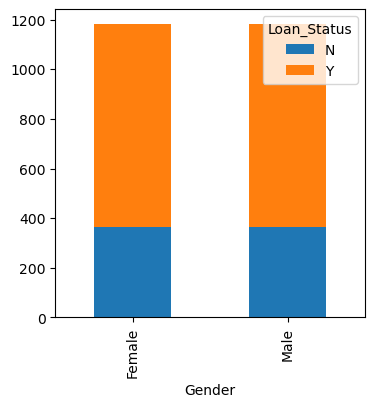

In [29]:
gender=pd.crosstab(tr['Gender'],tr['Loan_Status'])
gender.plot(kind='bar',stacked=True,figsize=(4,4))

<Axes: xlabel='Race'>

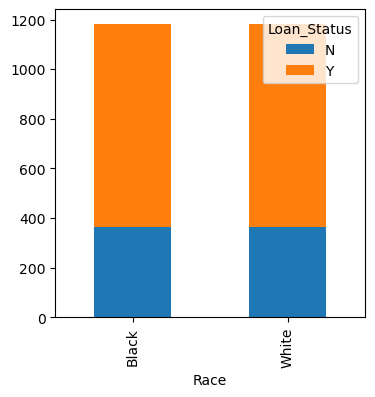

In [30]:
gender=pd.crosstab(tr['Race'],tr['Loan_Status'])
gender.plot(kind='bar',stacked=True,figsize=(4,4))

In [31]:
tr['Gender'].value_counts()

Gender
Male      1182
Female    1182
Name: count, dtype: int64

In [32]:
tr['Race'].value_counts()

Race
Black    1182
White    1182
Name: count, dtype: int64